1. Load the dataset from the file Vertebral column 3C.dat and visualize data using scatter plots
with the class label being the y-axis and one of features being the x-axis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Vertebral_column_3C.dat',sep=' ',header=None,names=['Pelvic Incidence','pelvic tilt', 'lumbar lordosis angle', 'sacral slope', 'pelvic radius', 'grade of spondylolisthesis','Label'],encoding='utf-8')
df.tail()


,Pelvic Incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Label
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO
309,33.84,5.07,36.64,28.77,123.95,-0.20,NO


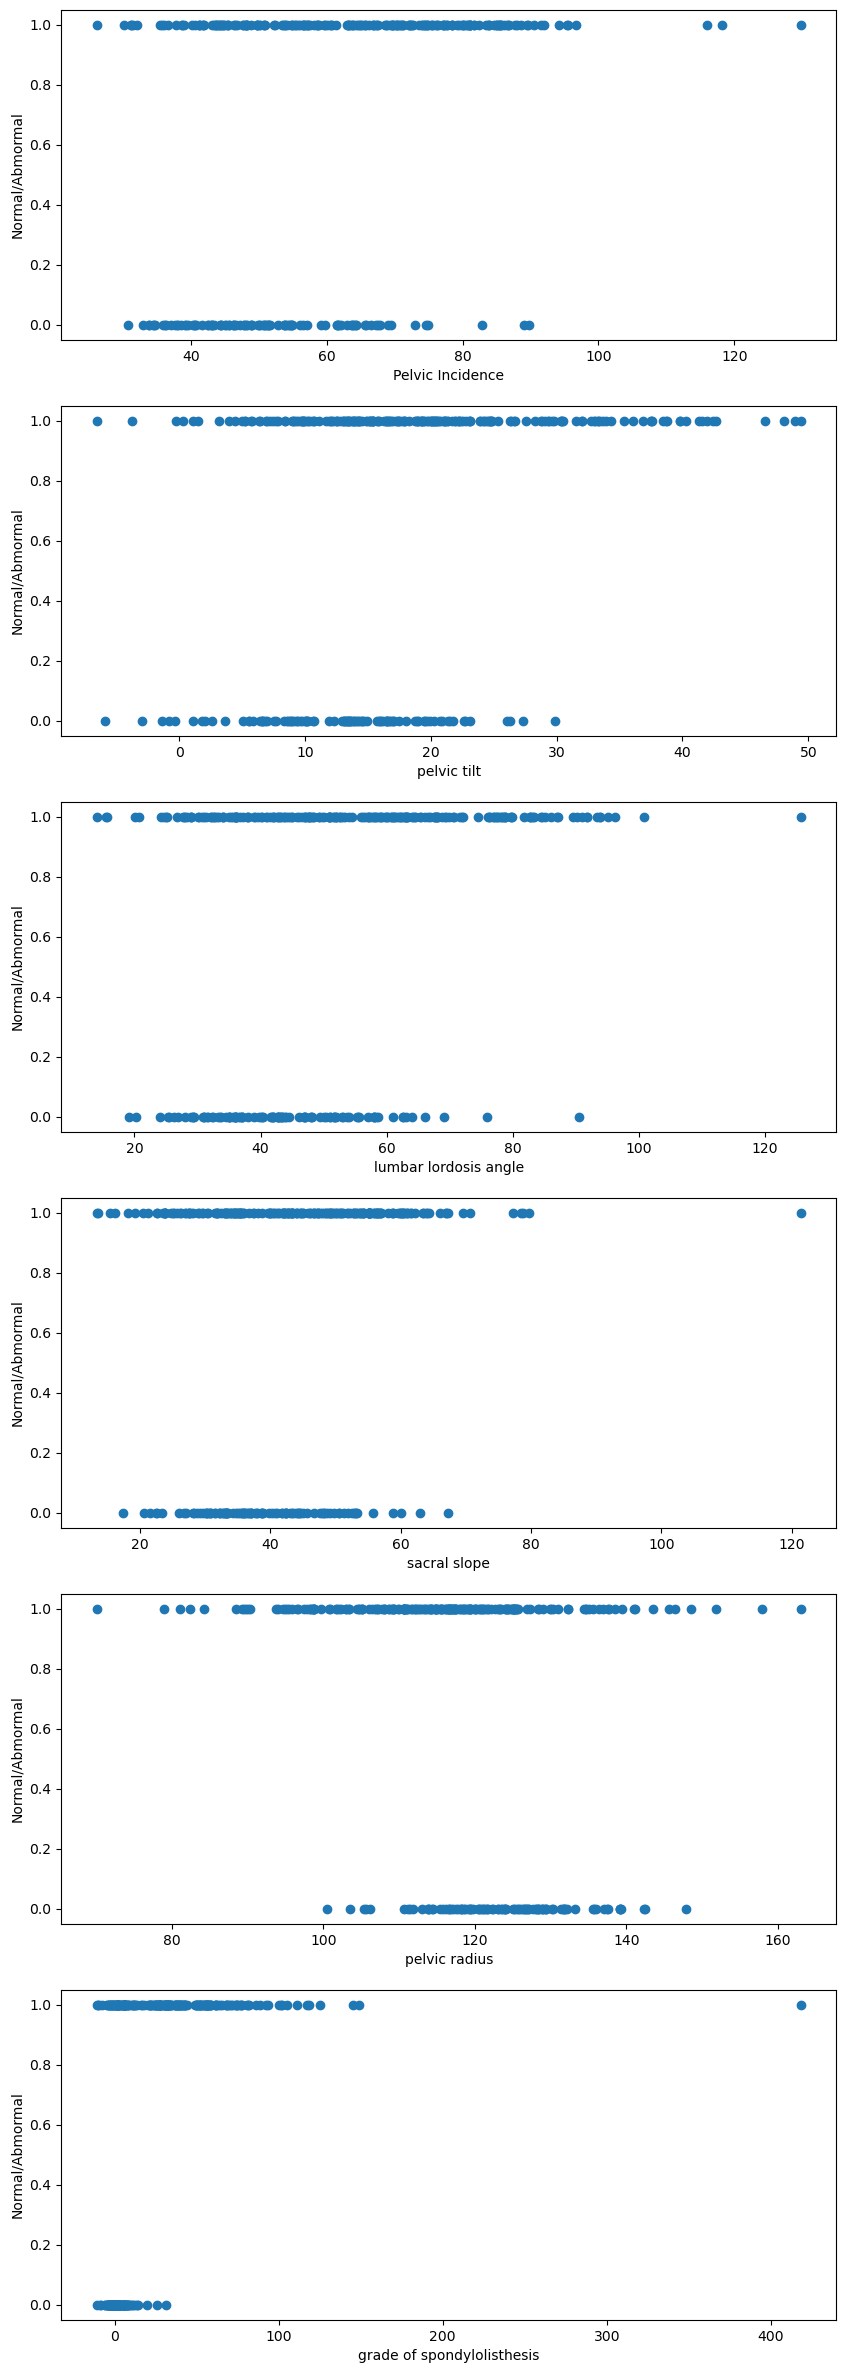

In [3]:
#Map label to 0 and 1
y = df.iloc[:,6].values
y = np.where(y == "NO",0,1) #No = 0, everything else is 1. Therefore, 0 = normal and 1 = abnormal
fig, axs = plt.subplots(6,1,figsize=(10,30))

#capture independent variables by returning a new df without the label column
independent_variables = df.drop(labels=['Label'],axis=1)



for i in range(6):
    axs[i].scatter(df.iloc[:,i],y)
    axs[i].set(xlabel=df.columns[i],ylabel='Normal/Abmormal')
    


2. Divide the data into a training set and a testing set. Use the training set to train a logistic
regression model with the sckit-learn logistic regression object, and use the trained model to
predict the class labels of the testing data samples. Summarize the prediction results in a
confusion matrix and calculate the prediction accuracy.

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(independent_variables,y,test_size=0.3,random_state=10)

y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [99]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(Y_train))
print('Labels counts in y_test:', np.bincount(Y_test))

Labels counts in y: [100 210]
Labels counts in y_train: [ 72 145]
Labels counts in y_test: [28 65]


In [117]:
#standardize features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

model = LogisticRegression(multi_class='ovr')
model.fit(X_train_std,Y_train)

prediction_test = model.predict(X_test_std)

#verify acccuracy
print(f'Accuracy = {metrics.accuracy_score(Y_test,prediction_test)}')

confusion_matrix = metrics.confusion_matrix(Y_test,prediction_test)
print(f'Confusion matrix\n {confusion_matrix}')

Accuracy = 0.8709677419354839
Confusion matrix
 [[24  4]
 [ 8 57]]


3. Repeat Problem 2 with the LDA classifier.

In [154]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model_lda = LinearDiscriminantAnalysis()
lda_train = model_lda.fit(X_train,Y_train)
lda_predict = model_lda.predict(X_test)
#verify acccuracy
print(f'Accuracy = {metrics.accuracy_score(Y_test,lda_predict)}')

confusion_matrix = metrics.confusion_matrix(Y_test,lda_predict)
print(f'Confusion matrix\n {confusion_matrix}')

Accuracy = 0.8602150537634409
Confusion matrix
 [[20  8]
 [ 5 60]]


4. Repeat Problem 2 with SVM. Use at least two kernels and compare their prediction accuracy.

In [157]:
from sklearn.svm import SVC

#RBF Kernel
model_svc = SVC(kernel='rbf')
svc_train = model_svc.fit(X_train,Y_train)
svc_predict = model_svc.predict(X_test)

#verify acccuracy
print(f'Accuracy = {metrics.accuracy_score(Y_test,svc_predict)}')

confusion_matrix = metrics.confusion_matrix(Y_test,svc_predict)
print(f'Confusion matrix\n {confusion_matrix}')

Accuracy = 0.8602150537634409
Confusion matrix
 [[24  4]
 [ 9 56]]


In [159]:
#Poly kernel
model_svc_poly = SVC(kernel='poly')
svc_train_poly = model_svc_poly.fit(X_train,Y_train)
svc_predict_poly = model_svc_poly.predict(X_test)

#verify acccuracy
print(f'Accuracy = {metrics.accuracy_score(Y_test,svc_predict_poly)}')

confusion_matrix = metrics.confusion_matrix(Y_test,svc_predict_poly)
print(f'Confusion matrix\n {confusion_matrix}')

Accuracy = 0.8924731182795699
Confusion matrix
 [[24  4]
 [ 6 59]]
